# Implementation of Gradient Descent algorithm for Linear Regression

In [1]:
import numpy as np
import pandas as pd

### Importing the dataset

In [2]:
data = pd.read_csv('sgemm_product.csv')

In [3]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
data['Run'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'] )/4

In [5]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [6]:
data = data.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


### Preprocessing the dataset

#### Taking features and target variables

# Random selection of column

In [7]:
import random
test_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
random_num = random.choice(test_list)
variables = []
for i in range(8):
    random_num = random.choice(test_list)
    variables.append(random_num)
    test_list.remove(random_num)
print(variables)

[3, 11, 10, 9, 2, 5, 0, 13]


In [8]:
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run'],
      dtype='object')

In [9]:
col_random = ['MWG', 'KWG', 'NDIMC', 'KWI', 'VWM','VWN', 'SA', 'SB']
X_random = data[col_random]
X_random

,MWG,KWG,NDIMC,KWI,VWM,VWN,SA,SB
0,16,16,8,2,1,1,0,0
1,16,16,8,2,1,1,0,1
2,16,16,8,2,1,1,1,0
3,16,16,8,2,1,1,1,1
4,16,16,8,2,1,1,0,0
...,...,...,...,...,...,...,...,...
241595,128,32,32,8,4,4,1,1
241596,128,32,32,8,4,4,0,0
241597,128,32,32,8,4,4,0,1
241598,128,32,32,8,4,4,1,0


# Select the column

In [10]:
columns = ['MWG', 'MDIMC', 'MDIMA', 'KWI','VWN', 'STRM', 'STRN', 'SA', 'SB']
X = data[columns]
X.shape[0]

241600

In [11]:
X.head()

,MWG,MDIMC,MDIMA,KWI,VWN,STRM,STRN,SA,SB
0,16,8,8,2,1,0,0,0,0
1,16,8,8,2,1,0,0,0,1
2,16,8,8,2,1,0,0,1,0
3,16,8,8,2,1,0,0,1,1
4,16,8,8,2,1,0,1,0,0


In [12]:
Y = data.iloc[:,-1].values
y = np.log(Y)
print(y.shape[0])

241600


#### Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X = sc.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
X_random = sc.fit_transform(X_random)
X_random

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.42857143, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.42857143, 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.42857143, 1.        ,
        1.        ]])

In [15]:
np.mean(X, axis = 0)

array([0.57513718, 0.24732892, 0.39046358, 0.5       , 0.20694418,
       0.5       , 0.5       , 0.5       , 0.5       ])

In [16]:
np.std(X, axis = 0)

array([0.37918868, 0.32806858, 0.39122495, 0.5       , 0.27910792,
       0.5       , 0.5       , 0.5       , 0.5       ])

#### Train-test split of the dataset

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, 
                                                    random_state = 40)
X_rand_train, X_rand_test, y_rand_train, y_rand_test = train_test_split(X_random, y, test_size = 0.3, shuffle = True, 
                                                    random_state = 40)


In [18]:
print(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]) #printing number of rows

169120 169120 72480 72480


In [19]:
print(X_rand_train.shape[0], y_rand_train.shape[0], X_rand_test.shape[0], y_rand_test.shape[0]) #printing number of rowsprint(X_rand_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]) #printing number of rows

169120 169120 72480 72480


### Implementing the cost-function

#### Equation of the cost function for linear regression (Mean Square Error Cost function)

In [20]:
#Cost function
def mse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    J = np.sum(np.square(y_true - y_pred))/(2*m)
    return (J)

In [21]:
# Here the cost function takes two arguments


def rmse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    I = np.sqrt(np.sum(np.square(y_true - y_pred))/(2*m))
    return (I)

### Implementing Gradient Descent Algorithm

#### Implementing the function to calculate the predicted output

In [22]:
def output_lin_reg(X, theta):
    
    return (X @ theta)

#### Equation of gradient descent update rule for linear regression

In [23]:
def grad_des_lin_reg(X, y, alpha , it , tol ):
    
    assert (X.shape[0] == y.shape[0]), "Dimension Mismatch"
    
    m = X.shape[0]   # Number of training samples
    X = np.c_[np.ones(m),X] # Inserting a column of all ones 
    k = X.shape[1]   # number of predictors (including the dummy predictor)
    
    np.random.seed(32)
    theta = np.random.randn(k) # Initializing the model parameters with random values
    
    costs = []
    count = 0
    
    for i in range(it):
        y_pred = output_lin_reg (X, theta)
        J = rmse_cost(y, y_pred)
        costs.append(J)
        del_theta = (-1)*(alpha/m)*(X.T @ (y_pred - y))
        theta += del_theta
        if np.linalg.norm(del_theta) <= tol:
            break
        count += 1
    
    return theta, costs, count
    

### Running gradient descent algorithm

# Random gradient descent and Selected Columns 

In [24]:
thetar, rcosts, rcount = grad_des_lin_reg(X_rand_train, y_rand_train, alpha = 0.03, it = 2000, tol = 0.001)

In [25]:
theta, costs, count = grad_des_lin_reg(X_train, y_train, alpha = 0.03, it = 2000, tol = 0.001)

In [26]:
print("theta: {}, \n number of iterations = {}".format(thetar, rcount))

theta: [ 3.69319151  1.43610648  0.0836848  -0.61397801  0.03663886  0.3017049
  0.75972235 -0.12732861  0.01858661], 
 number of iterations = 1074


In [27]:
print("random cost: {}, \n number of iterations ={}, ".format(rcosts,rcount))

random cost: [2.071745866050175, 1.9669717497006955, 1.8736482519016366, 1.790742471836099, 1.7172798847122874, 1.6523428337557164, 1.5950700330235972, 1.5446567033717713, 1.5003549537673548, 1.4614740547914384, 1.427380322394637, 1.3974964232477056, 1.3713000117676146, 1.3483216984332567, 1.3281424192976963, 1.310390323138201, 1.2947373158206525, 1.2808954049037098, 1.2686129766139118, 1.2576711176244337, 1.2478800703642217, 1.2390758864862736, 1.2311173210073332, 1.223882990792243, 1.2172688059748535, 1.211185671516437, 1.2055574480159792, 1.2003191555708839, 1.1954154013750424, 1.1907990103034343, 1.1864298375083668, 1.1822737426647494, 1.178301706653974, 1.1744890729439443, 1.1708148975431472, 1.1672613930647004, 1.1638134540550416, 1.1604582522726623, 1.1571848920169943, 1.1539841168927583, 1.1508480605473472, 1.1477700349412066, 1.1447443506109147, 1.141766164171153, 1.1388313489855557, 1.1359363855283093, 1.1330782684687661, 1.1302544279501807, 1.127462662909993, 1.1247010846111

In [28]:
print("theta: {}, \n number of iterations = {}".format(theta, count))

theta: [ 3.77704192  1.62715061 -0.89275502 -0.07072113  0.04591703  0.76933042
 -0.05988324  0.05612483 -0.11870381  0.02548533], 
 number of iterations = 1050


In [29]:
print("random costs: {}, \n number of iterations ={}, ".format(costs,count))

random costs: [2.201391550127124, 2.083144381666502, 1.9792261922124375, 1.8881808280968182, 1.8086451837479327, 1.7393478876020174, 1.6791093331178009, 1.6268422264765412, 1.581551899362081, 1.5423358053716278, 1.5083818409745549, 1.478965360182063, 1.4534449477469142, 1.431257155824893, 1.4119104872919643, 1.3949789319697083, 1.3800953437462118, 1.3669449027663358, 1.3552588515085706, 1.344808637121205, 1.3354005414636472, 1.3268708382089993, 1.3190814840458622, 1.311916327914272, 1.3052778069947062, 1.299084089242868, 1.2932666180654135, 1.287768013896663, 1.2825402888514534, 1.277543333438033, 1.2727436378872843, 1.268113214547656, 1.2636286917116721, 1.259270552991662, 1.2550224998399482, 1.2508709179573911, 1.2468044311358832, 1.2428135285405224, 1.238890253575267, 1.2350279443190106, 1.231221017097627, 1.2274647861025354, 1.223755313107468, 1.2200892822999383, 1.2164638960573544, 1.2128767881819476, 1.2093259516831396, 1.2058096786774481, 1.2023265103791283, 1.1988751954917758, 

### Plotting cost vs iterations

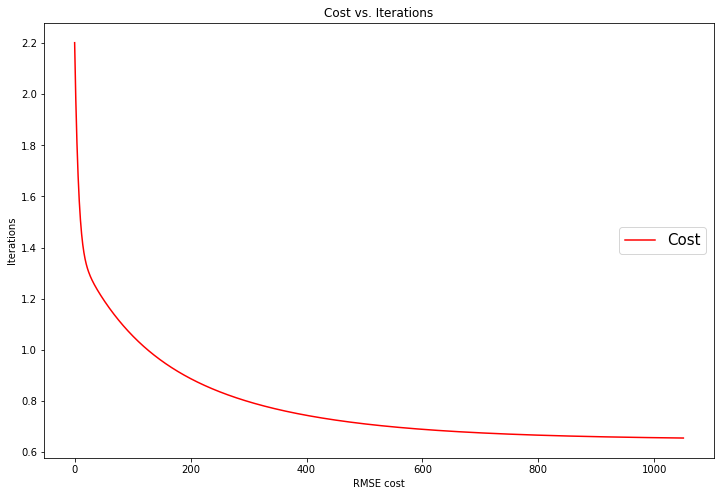

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.plot(costs,'r')
plt.legend(['Cost'], loc=5,prop={'size': 15})
plt.title("Cost vs. Iterations")
plt.xlabel("RMSE cost")
plt.ylabel("Iterations")
plt.show()

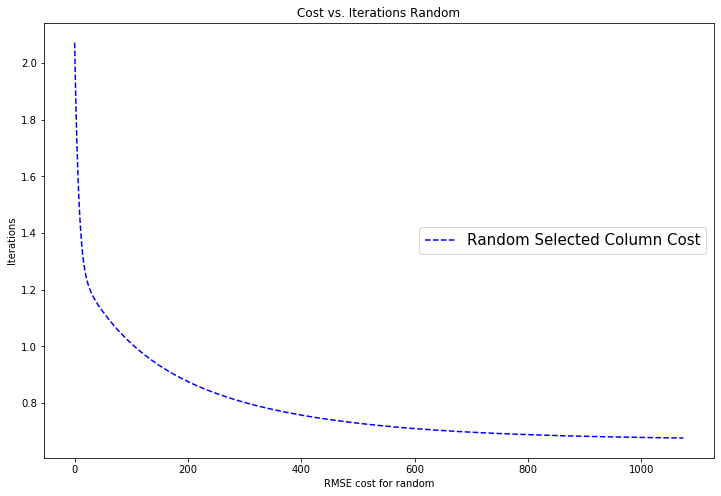

In [31]:
#Random selected plot
plt.figure(figsize = (12,8))
plt.plot(rcosts,'b--')
plt.legend(['Random Selected Column Cost'], loc=5,prop={'size': 15})
plt.title("Cost vs. Iterations Random")
plt.xlabel("RMSE cost for random")
plt.ylabel("Iterations")
plt.show()

### Predicting the model output on test dataset

In [32]:
y_pred_rand_train = output_lin_reg(np.c_[np.ones(X_rand_train.shape[0]),X_rand_train], thetar)

In [33]:
y_pred_train = output_lin_reg(np.c_[np.ones(X_train.shape[0]),X_train], theta)

In [34]:
pd.DataFrame(np.c_[y_train, y_pred_train], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,6.560497,5.640687
1,3.989030,3.650009
2,5.790067,4.562645
3,4.237543,3.507158
4,3.700252,4.453154
...,...,...
169115,3.497189,4.226828
169116,6.237089,5.210561
169117,3.929126,3.697157
169118,6.783444,4.407621


In [35]:
pd.DataFrame(np.c_[y_rand_train, y_pred_rand_train], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,6.560497,5.184593
1,3.989030,3.826246
2,5.790067,4.847248
3,4.237543,4.392351
4,3.700252,4.182613
...,...,...
169115,3.497189,4.460298
169116,6.237089,5.184523
169117,3.929126,3.705272
169118,6.783444,4.437758


In [36]:
rmse_cost(y_rand_train,  y_pred_rand_train)

0.6764446695893828

In [37]:
rmse_cost(y_train, y_pred_train)

0.6546666463611563

In [38]:
y_pred_rand_test = output_lin_reg(np.c_[np.ones(X_rand_test.shape[0]),X_rand_test], thetar)

In [39]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta)

In [40]:
pd.DataFrame(np.c_[y_rand_test, y_pred_rand_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,5.008065,5.391118
1,4.226213,5.106650
2,5.422624,5.147140
3,3.806718,3.367846
4,3.828043,3.815011
...,...,...
72475,5.280064,5.214956
72476,3.382694,4.424410
72477,5.057026,5.128755
72478,3.369449,5.029670


In [41]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,5.008065,5.603147
1,4.226213,4.452235
2,5.422624,5.497435
3,3.806718,3.118827
4,3.828043,4.092120
...,...,...
72475,5.280064,4.262129
72476,3.382694,4.704189
72477,5.057026,4.365402
72478,3.369449,4.908598


In [42]:
mse_cost(y_rand_test, y_pred_rand_test)

0.4636928308259549

In [43]:
rmse_cost(y_rand_test, y_pred_rand_test)

0.6809499473720186

In [44]:
mse_cost(y_test, y_pred_test)

0.43391720432804914

In [45]:
rmse_cost(y_test, y_pred_test)

0.6587239211749101

### Verifying  Linear Regression by in-built function python library Scikit-Learn (sklearn)

In [213]:
from sklearn.linear_model import LinearRegression 

In [214]:
model = LinearRegression().fit(X_train, y_train)

In [215]:
model.coef_

array([ 1.47753443, -1.02232628, -0.11864734, -0.02721665,  0.59731583,
       -0.13389811, -0.01831036, -0.19141741, -0.0476231 ])

In [216]:
model.intercept_

4.159202564411846

In [217]:
y_pred_test = model.predict(X_test)

In [218]:
y_pred_train = model.predict(X_train)

In [44]:
pd.DataFrame(np.c_[y_train, y_pred_train], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,6.560497,5.653689
1,3.989030,3.626289
2,5.790067,4.689338
3,4.237543,3.499250
4,3.700252,4.517478
...,...,...
169115,3.497189,4.403089
169116,6.237089,5.163262
169117,3.929126,3.705387
169118,6.783444,4.465275


In [45]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,5.008065,5.453025
1,4.226213,4.287026
2,5.422624,5.485123
3,3.806718,3.057285
4,3.828043,4.171894
...,...,...
72475,5.280064,4.170448
72476,3.382694,4.509580
72477,5.057026,4.231236
72478,3.369449,4.848308


In [46]:
mse_cost(y_test, y_pred_test)

0.4263122675177259

In [47]:
rmse_cost(y_test, y_pred_test)

0.652925928048294

In [48]:
rmse_cost(y_train, y_pred_train)

0.6484167458525417

In [219]:
rmse_cost(y_rand_test, y_pred_rand_test)

0.6809499473720186